In [1]:
%matplotlib inline
import os, random
from shutil import copytree
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [12]:
for i in range(10):
    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
    try:
        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample5/patches1/' + patches1)
    except FileExistsError:
        continue
    try:
        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample5/patches0/' + patches0)
    except FileExistsError:
        continue

In [17]:
import glob2
for filename in (os.listdir(data_path)):
    for image in  glob2.glob(data_path  + filename+'/*'):
        print (image)

/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439751_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274652_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274829_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274887_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275151_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275436_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793540579077826395208_275441_224x224.bc
/Volumes/Backups/data/LUNA16/patches/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.10039813879354057

In [ ]:
import glob2
from skimage import color
image_labels = []
img_array = np.zeros((1,3,224,224),dtype=np.float32)
print(type(img_array[0][0][0][0]))
i=0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(data_path + "sample2/")):
    print(filename)
    for image in  glob2.glob(data_path + "sample2/" + filename+'/*'):
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
            print(type(image_labels[0]))
        else:
            image_labels.append(np.int16(1.0))
        print ("imagename: " + image)
        img = color.gray2rgb(load_array(image)).astype(np.float32)
        print("img type: " + str(type(img[0][0][0])))
        np_img = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        print(np_img.shape)
        print("np_img type : " + str(type(np_img[0][0][0])))
        tmp_img = np.zeros((1,3,224,224),dtype=np.float32)
        print(tmp_img.shape)
        print("tmp_img type : " + str(type(tmp_img[0][0][0][0])))
        tmp_img[0] = np_img
        print("np.shape: " + str(tmp_img.shape))
        img_array = np.concatenate((img_array, tmp_img))
        print("img_array.shape :" + str(img_array.shape))
        i += 1
img_array = img_array[1:]

In [18]:
import numpy
numpy.random.seed(29)
d = numpy.random.randint(0, 2, size=(3,3,3))
z,x,y = d.nonzero()
d
d.nonzero()

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2]),
 array([0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2]),
 array([0, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2]))

In [23]:
z,x,y = d.nonzero()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.savefig("demo.png")
plt.show()

KeyboardInterrupt: 

In [21]:
type(d)

numpy.ndarray

In [10]:
import SimpleITK as sitk
import numpy as np
import csv
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpyImage = sitk.GetArrayFromImage(itkimage)
    numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
    numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))
    return numpyImage, numpyOrigin, numpySpacing


In [12]:
def worldToVoxelCoord(worldCoord, origin, spacing):
    stretchedVoxelCoord = np.absolute(worldCoord - origin)
    voxelCoord = stretchedVoxelCoord / spacing
    return voxelCoord

In [13]:
img_path = '/Volumes/Backups/data/LUNA16/subset1/1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886.mhd'

In [14]:
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print (numpyImage.shape)
print (numpyOrigin.shape)
print (numpyOrigin)
print (numpySpacing)

(123, 512, 512)
(3,)
[-338.       -210.       -212.199997]
[ 2.5         0.82031202  0.82031202]


In [22]:
d = numpyImage

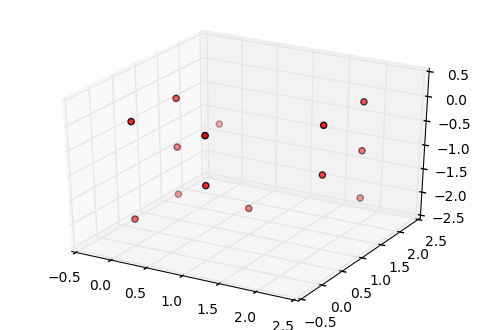

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, -z, zdir='z', c= 'red')
plt.savefig("demo.png")
